<a href="https://colab.research.google.com/github/Milly00/inmersionAlura/blob/main/LESSON_2_ALURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/ALURA/inmuebles_bogota.csv')


In [24]:
columnas = {'Baños': 'Banos', 'Área': 'Area'} #diccionario en python
inmuebles = inmuebles.rename(columns=columnas) #Asignamos a las columnas los valores del diccionario

inmuebles.sample(10) #Para tomar una muestra

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2188,Apartamento,Apartamento en venta en Cedritos,3,2,90,Cedritos,Usaquén,$ 550.000.000
4778,Apartamento,Apartamento en venta en Barrios Unidos,1,2,70,Barrios Unidos,Los Andes,$ 474.500.000
9273,Apartamento,Apartamento en venta en Kennedy,3,2,85,Kennedy,Kennedy Central,$ 300.000.000
5115,Apartamento,Apartamento en venta en Bella Suiza,3,4,130,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 830.000.000
4039,Apartamento,Apartamento en venta en Engativa,3,2,61,Engativa,Engativá,$ 220.000.000
2550,Apartamento,Apartamento en venta en Bella Suiza,2,2,95,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 580.000.000
339,Apartamento,Apartamento en venta en El Batán,2,2,75,El Batán,La Alhambra,$ 447.500.000
9373,Apartamento,Apartamento en venta en Villemar,2,1,45,Villemar,Fontibón,$ 160.000.000
725,Casa,Casa en venta en Teusaquillo,4,4,200,Teusaquillo,Teusaquillo,$ 1.350.000.000
5969,Apartamento,Apartamento en venta en Mazuren,4,3,96,Mazuren,El Prado,$ 300.000.000


# Lección 2

In [25]:
#Calcular el metro cuadrado
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [26]:
inmuebles.Valor[0]

'$ 360.000.000'

In [27]:
inmuebles.Valor[0].split()

['$', '360.000.000']

In [28]:
#Tratar la columna valor para trabajarla como númerico
#Se convierte a string ya que es de tipo pandas series
inmuebles.Valor.str.split()
#Para devolverlo en formato de dataframe
inmuebles.Valor.str.split(expand=True)
#Agrego la nueva columna al dataframe
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1] #Aún es un string
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
2717,Apartamento,Apartamento en venta en Ciudadela Colsubsidio,3,1,50,Ciudadela Colsubsidio,Bolivia,$ 190.000.000,$,190.000.000
8709,Apartamento,Apartamento en venta en Santa Fe,1,1,32,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 260.000.000,$,260.000.000
7713,Apartamento,Apartamento en venta en Engativa,3,2,99,Engativa,Engativá,$ 600.000.000,$,600.000.000
3196,Apartamento,Apartamento en venta en Santa Barbara,2,2,81,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,$,510.000.000
1067,Apartamento,Apartamento de dos habitaciones,2,2,59,Usaquén,Usaquén,$ 435.000.000,$,435.000.000


In [29]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [30]:
#Para que se entienda que lo que se quiere es un dataframe
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [31]:
#Transformamos los datos de precio a float
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [32]:
inmuebles.describe()
#count: Cantidad de datos
#mean: Promedio de todo el conjunto de datos



,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [33]:
#Alterar algunos datos númericos
pd.set_option('display.precision',2)
#Se aplica una función lambda
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [34]:
#Localizamos el inmueble con el máx de habitaciones
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [35]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

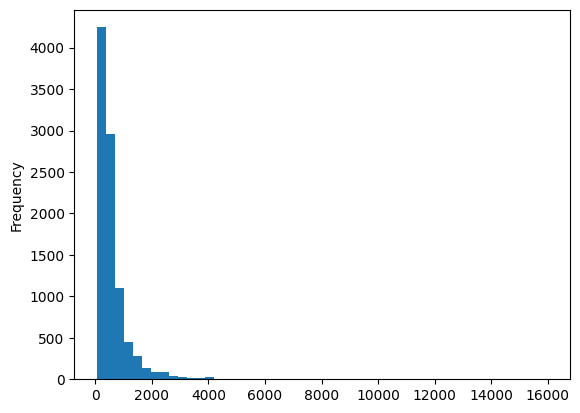

In [36]:
#Inmuebles a la venta
#Rango que vamos a estar abarcando en el hist 
#bins -> Separación de los bloques
inmuebles['Precio_Millon'].plot.hist(bins=50)

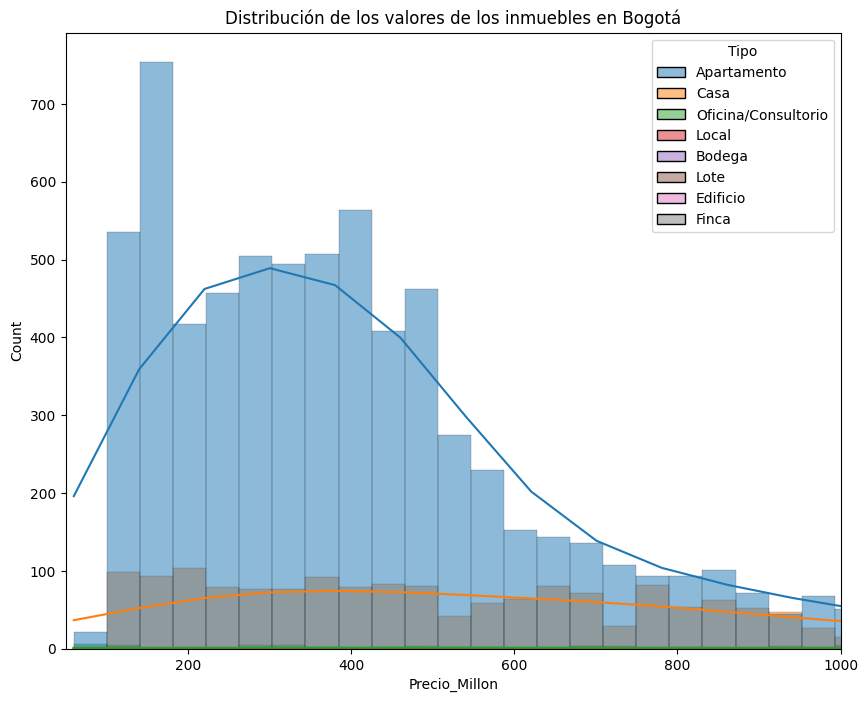

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos el lienzo para el gráfico
#figsize tamaño de la figura
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo')
grafica.set_title('Distribución de los valores de los inmuebles en Bogotá')
plt.xlim((50,1000)) #Establecemos el liimite máx de la variable
#plt.ylim((0,20))
#Curva de densidad , para saber como se comporta nuestros datos
#plt.savefig('/content/drive/MyDrive/ALURA/valor_inmuebles.png',format='png')
plt.show()

#hue añade otra dimension a los datos

# **Actividad**

**Seleccionar 3 tipos de inmuebles** 

Casa, Oficina, Local

<ipython-input-38-65df918f7182>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo',hue_order=["Casa","Oficina/Consultorio","Local"],palette=sns.color_palette("husl",5))


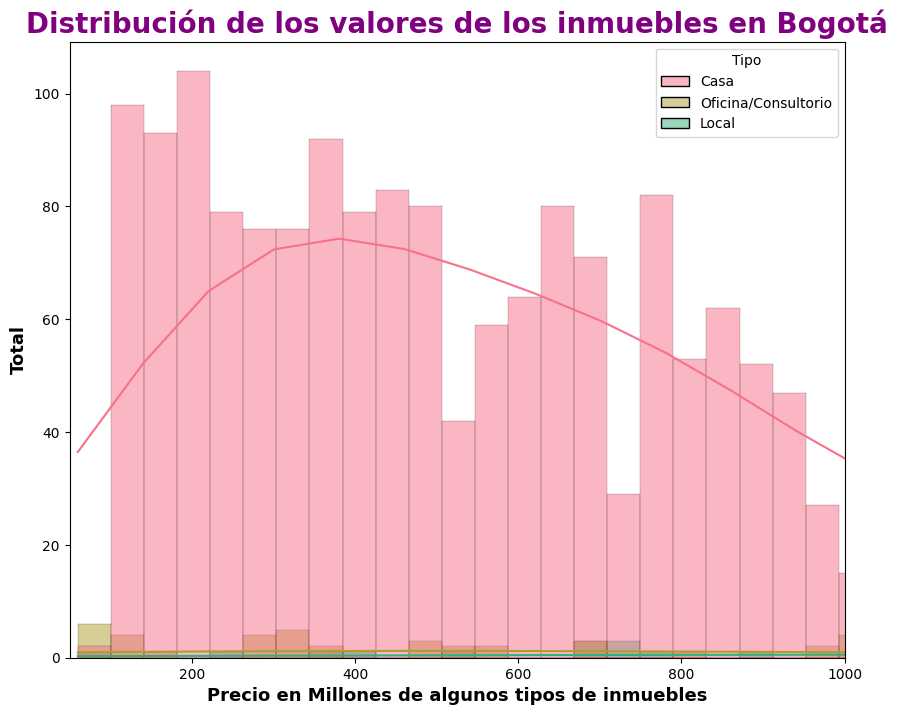

In [38]:
plt.figure(figsize=(10,8))
cm = sns.color_palette("plasma",20) 
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo',hue_order=["Casa","Oficina/Consultorio","Local"],palette=sns.color_palette("husl",5))
grafica.set_title('Distribución de los valores de los inmuebles en Bogotá',fontdict = {'fontsize': 20,       # Tamaño
                              'fontweight': 'bold', # Estilo
                              'color': 'purple'})
grafica.set_xlabel("Precio en Millones de algunos tipos de inmuebles",{'fontsize': 13,       # Tamaño
                              'fontweight': 'bold' # Estilo
                             })
grafica.set_ylabel("Total",{'fontsize': 13,       # Tamaño
                              'fontweight': 'bold' # Estilo
                             })
plt.xlim((50,1000)) #Establecemos el liimite máx de la variable
plt.show()

La mayor disponibilidad de inmuebles de tipo Casa se encuentran en valores cercanos a los 200M

# **Actividad 2**

Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.


In [39]:
inmuebles['Precio_M2'] = inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio_M2
4758,Oficina/Consultorio,Oficina/Consultorio en venta en Santa Barbara,1,1,116,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 1.014.570.000,$,1014570000,1014.57,8.75
3487,Apartamento,Apartamento en venta en Quinta Paredes,2,3,153,Quinta Paredes,Teusaquillo,$ 739.000.000,$,739000000,739.00,4.83
9511,Apartamento,Apartamento en venta en Nueva Autopista,4,5,250,Nueva Autopista,Los Cedros,$ 1.375.000.000,$,1375000000,1375.00,5.50
423,Casa,Casa en venta en Boyaca,3,3,106,Boyaca,Boyacá Real,$ 310.000.000,$,310000000,310.00,2.92
9410,Apartamento,Apartamento en venta en Cedritos,3,3,105,Cedritos,Usaquén,$ 600.000.000,$,600000000,600.00,5.71


<Axes: xlabel='Barrio'>

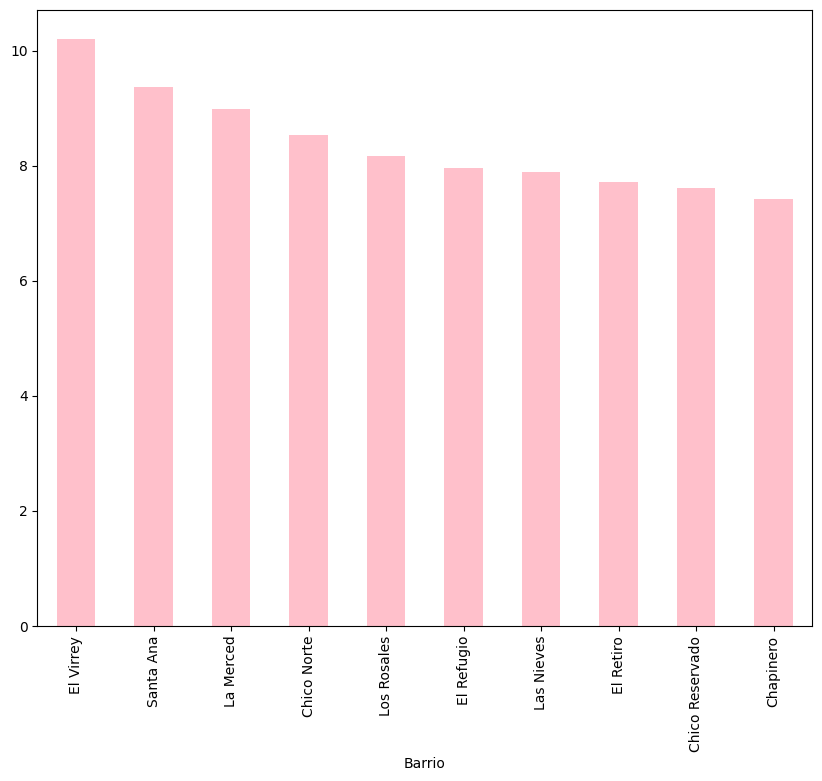

In [43]:
plt.figure(figsize=(10,8))
promedios = inmuebles.groupby('Barrio')['Precio_M2'].mean()
top = promedios.sort_values(ascending=False).head(10)
top.plot.bar(color='pink')

<Axes: xlabel='Tipo'>

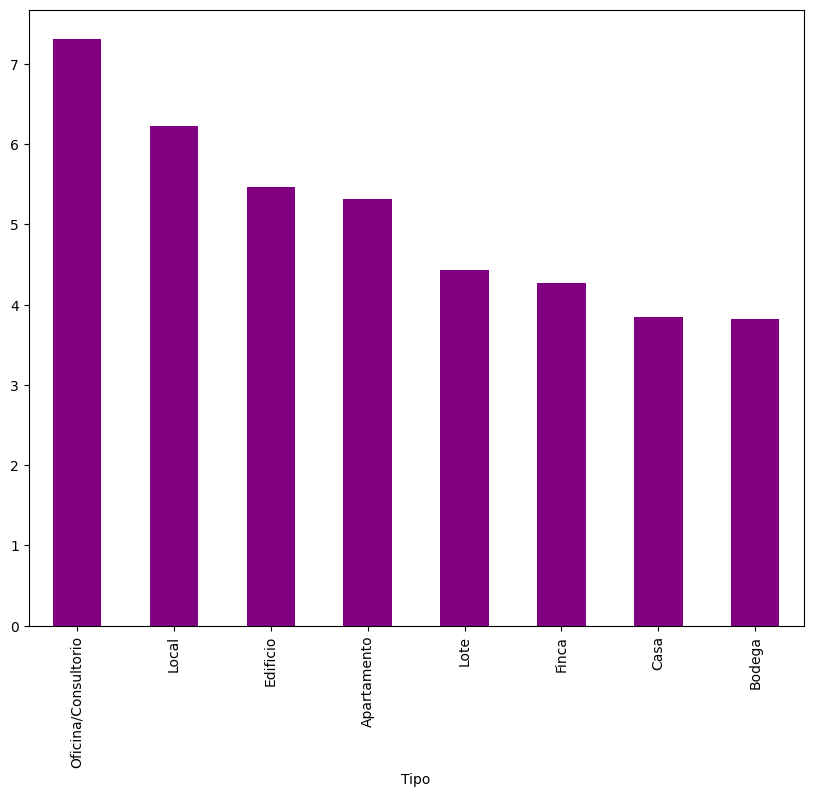

In [45]:
plt.figure(figsize=(10,8))
promedios = inmuebles.groupby('Tipo')['Precio_M2'].mean()
top = promedios.sort_values(ascending=False).head(10)
top.plot.bar(color='purple')